In [1]:
from mlwpy import *
%matplotlib inline

In [2]:
np.random.randint(7)

6

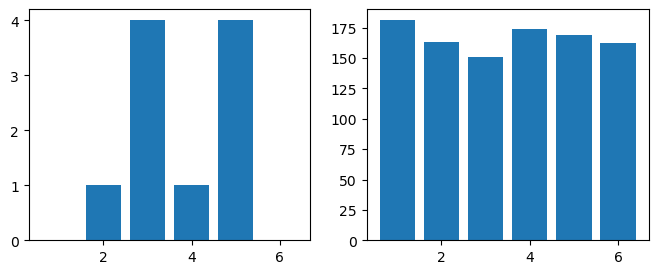

In [3]:
few_rolls = np.random.randint(1, 7, size = 10)
many_rolls = np.random.randint(1, 7, size =1000)
few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3))
ax1.bar(np.arange(1, 7), few_counts)
ax2.bar(np.arange(1, 7), many_counts)
plt.show()

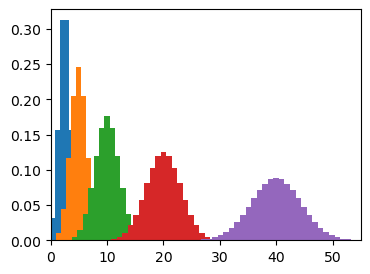

In [4]:
import scipy.stats as ss 
b = ss.distributions.binom
for flips in [5, 10, 20, 40, 80]:
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
plt.xlim(0, 55)
plt.show()

линейные кобинации

In [5]:
quantity = [2, 12, 3]
costs = [12.5, .5, 1.75]
partial_cost = []
for q,c in zip(quantity, costs):
    partial_cost.append(q*c)
sum(partial_cost)

36.25

In [6]:
quantity = [2, 12, 3]
costs = [12.5, .5, 1.75]
sum(q*c for q, c in zip(quantity, costs))


36.25

In [7]:
quantity = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])
np.sum(quantity @ costs)

36.25

In [8]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1000,3.5000,1.4000,0.2000
1,4.9000,3.0000,1.4000,0.2000
2,4.7000,3.2000,1.3000,0.2000
3,4.6000,3.1000,1.5000,0.2000
4,5.0000,3.6000,1.4000,0.2000


In [10]:
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3), iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
147,6.5000,3.0000,5.2000,2.0000,2
148,6.2000,3.4000,5.4000,2.3000,2
149,5.9000,3.0000,5.1000,1.8000,2


c:\Users\Laptop_Timurki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


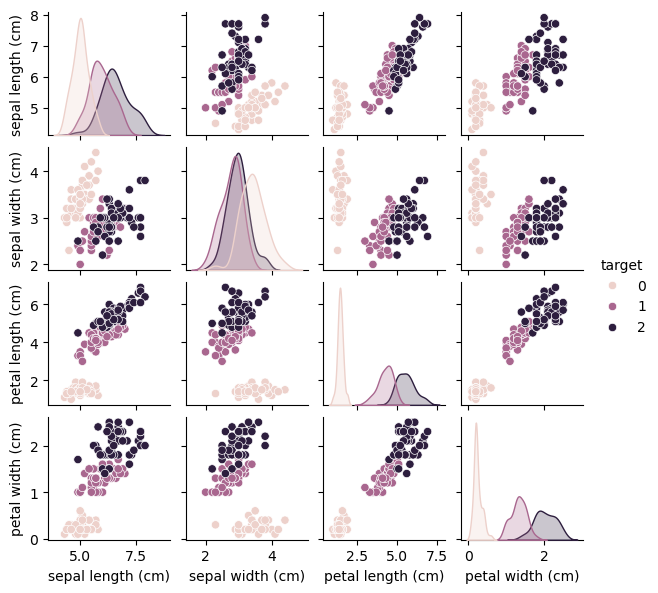

TypeError: 'NoneType' object is not subscriptable

In [11]:
sns.pairplot(iris_df, hue='target', size = 1.5);
plt.show()[0]

In [ ]:
print('targets:, {}'.format(iris.target_names), iris.target_names[0], sep = '\n')

targets:, ['setosa' 'versicolor' 'virginica']
setosa


In [ ]:
(iris_train_ftrs, iris_test_ftrs, iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data, iris.target, test_size=.25)
print(iris_train_ftrs.shape)
print(iris_test_ftrs.shape)

(112, 4)
(38, 4)


In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)
print("3NN accuracy:", metrics.accuracy_score(iris_test_tgt, preds))

3NN accuracy: 0.9210526315789473


In [ ]:
nb = naive_bayes.GaussianNB()
fit = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)
print("NB accuracy:", metrics.accuracy_score(iris_test_tgt, preds))

NB accuracy: 0.9473684210526315


In [ ]:
from sklearn import (datasets, metrics, model_selection as skms, naive_bayes, neighbors)

iris = datasets.load_iris()
(iris_train_ftrs, iris_test_ftrs, iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data, iris.target, test_size=.9, random_state=42)

models = {"kNN": neighbors.KNeighborsClassifier(n_neighbors=3),
          'NB': naive_bayes.GaussianNB()}
for name, model in models.items():
    fit = model.fit(iris_train_ftrs, iris_train_tgt)
    predictions = fit.predict(iris_test_ftrs)
    score = metrics.accuracy_score(iris_test_tgt, predictions)
    print("{:3>s}: {:0.2f}".format(name, score))

kNN: 0.96
NB: 0.81
